# Modellvalidierung

Mit dem Bestimmtheitsmaß R²-Score haben wir eine Möglichkeit kennengelernt,
einzuschätzen, wie gut unser Modell ist. Je näher der R²-Score an der 1 ist,
desto besser. Aber selbst ein perfektes Bewertungsmaß bedeutet nicht, dass das
Modell geeignet ist. Im Folgenden beschäftigen wir uns mit der Aufteilung von
Daten in Test- und Trainingsdaten.

## Lernziele 

```{admonition} Lernziele
:class: important
* Sie wissen, warum man Daten in **Trainingsdaten** und **Testdaten** aufteilt.
* Sie können mit der Funktion **train_test_split()** NumPy-Arrays und
  Pandas-DataFrames in Trainings- und Testdaten aufteilen.
* Sie kennen die Idee der **Kreuzvalidierung**.
```

## Auswendiglernen nützt nichts

Um die Probleme bei der Modellauswahl zu verdeutlichen, betrachten wir einen
künstlich generierten Datensatz. Angenommen, wir hätten die folgenden sieben
Messwerte gemessen.

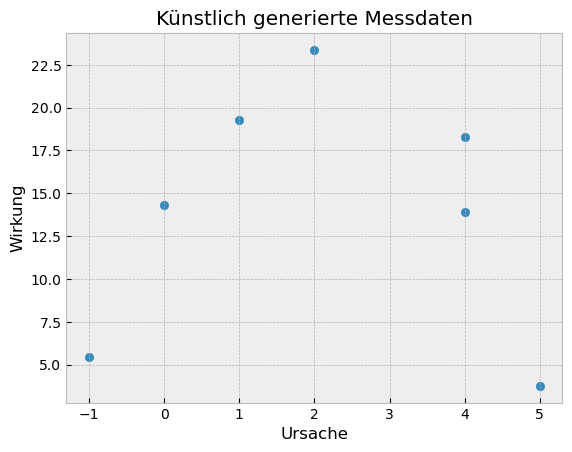

In [1]:
import matplotlib.pylab as plt
import numpy as np

# styling of plots
plt.style.use('bmh')

# artificial data: f(x) = −2𝑥^2 + 8𝑥 + 15 + error
X = np.array([-1, 0, 1, 2,  4, 4, 5], np.newaxis)
y = np.array([5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586])

# visualization
fig, ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten');

Und nun würden wir das folgende Modell implementieren, der Name sagt alles! Um
nicht selbst den R²-Score implementieren zu müssen, nehmen wir den allgemeinen
von Scikit-Learn (siehe [Dokumentation Scikit-Learn →
r2_score}(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).

In [2]:
from sklearn.metrics import r2_score

class AuswendigLerner:
    def __init__(self) -> None:
        self.X = None
        self.y = None

    def fit(self, X,y):
        self.X = X
        self.y = y

    def predict(self, X):
        return self.y

# choose model and train
model = AuswendigLerner()
model.fit(X, y)

# prediction
y_predict = model.predict(X)

# check quality
r2 = r2_score(y,y_predict)
print('Der R2-Score ist: {:.2f}'.format(r2))



/opt/homebrew/Caskroom/miniconda/base/envs/python310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Der R2-Score ist: 1.00


Ein R²-Score von 1, unser Modell scheint perfekt zu funktionieren! Aber wie
prognostiziert es etwas Neues? Das Modell funktioniert zwar perfekt für die
vorgegebenen Trainingsdaten, aber ist **nicht verallgemeinerbar**.

## Daten für später aufheben

Bei der Modellauswahl und dem Training des Modells müssen wir also zusätzlich
berücksichtigen, ob das Modell verallgemeinerbar ist, also auch für neue,
zukünftige Daten eine verlässliche Prognose liefern wird. Da wir mit den uns
jetzt zur Verfügung stehenden Daten ein geeignetes Modell auswählen und nicht
auf später warten können, legen wir einen Teil der Daten zur Seite. Diese Daten
nennen wir **Testdaten**. Mit den übriggebliebenen Daten trainieren wir das
ML-Modell. Diese Daten nennen wir **Trainingsdaten**. Später nutzen wir dann die
Testdaten, um zu überprüfen, wie gut das Modell für neue Daten funktioniert, mit
denen nicht trainiert wurde.

Für die Aufteilung in Trainings- und Testdaten nehmen wir eine maßgeschneiderte
Funktion von Scikit-Learn namens `train_test_split()` (siehe auch [Dokumentation
Scikit-Learn →
train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).
Liegen die Daten als NumPy-Arrays für Input und Output vor, werden beide als
Argument der Funktion `train_test_split()` übergeben. Die Funktion
`train_test_split()` liefert dann vier Numpy-Arrays zurück, jeweils zuerst die
Trainings-, dann die Testdaten. Neuerdings beherrscht die
train_test-split-Funktion auch DataFrames. Dann würde der Aufruf

```python
df_train, df_test = train_test_split(df)
```

lauten. Wir wenden jetzt train_test_split() auf unsere künstlichen Messdaten an.

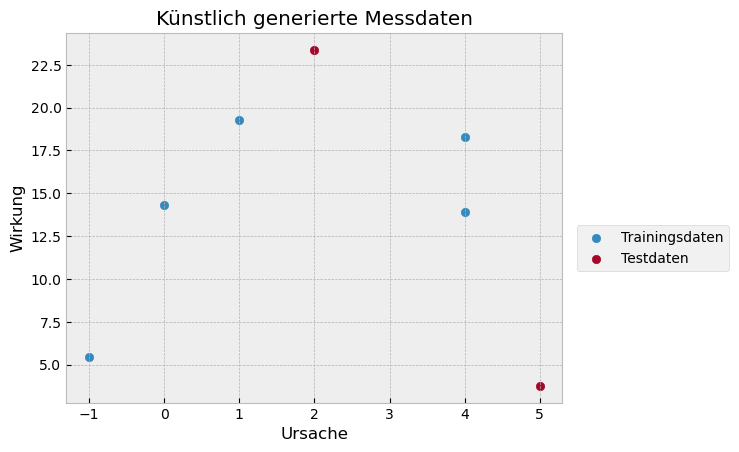

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, label='Trainingsdaten')
ax.scatter(X_test, y_test, label='Testdaten')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')
ax.legend(bbox_to_anchor=(1.35, 0.5));

Voreingestellt ist, dass die Funktion `test_train_split()` 25 % der Daten als
Testdaten zurückhält. Dabei werden die Daten, die in die Testdaten-Menge
wandern, zufällig ausgewählt. Daher erzeugt jeder Durchlauf des obigen Codes
auch eine andere Aufteilung in Test- und Trainingsdaten.

Die Funktion bietet aber auch Optionen, um den Split nach eigenen Wünschen zu
steuern.

* `test_size`: Mit der Option test_size kann auch ein anderer Wert als 25 %
  eingestellt werden. Möchte man beispielsweise nur 10 % der Daten für das
  Testen aufheben, so kann man `test_size=0.1` einstellen. Die prozentuale
  Angabe erfolgt dabei als ein Float zwischen 0.0 und 1.0. Verwenden wir
  hingegen einen Integer, so geht Scikit-Learn davon aus, dass wir die Anzahl
  der Testdaten spezifieren möchten. `test_size = 2` bedeutet, dass zwei
  Datenpunkte für später aufbewahren.
* `random_state`: Das zufällige Auswählen der Testdaten wird mit einem
  Zufallszahlengenerator durchgeführt, der bei jedem Durchgang neu gestartet
  wird. Wenn wir zwar eine zufällige Auswahl haben wollen, aber den Neustart des
  Zufallszahlengenerators verhindern wollen, können wir den Ausganszustand des
  Zufallszahlengenerators fixieren. Dazu wird ein Integer benutzt. Das ist vor
  allem für Präsentationen oder Lehrmaterialien interessant.

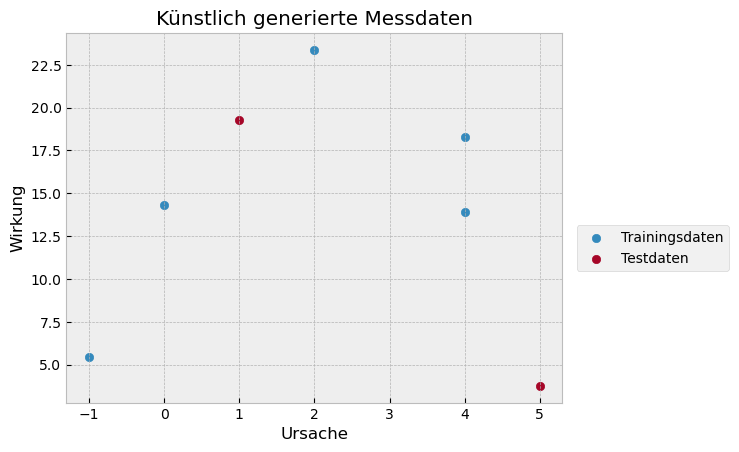

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=2, random_state=0)

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, label='Trainingsdaten')
ax.scatter(X_test, y_test, label='Testdaten')
ax.set_xlabel('Ursache')
ax.set_ylabel('Wirkung')
ax.set_title('Künstlich generierte Messdaten')
ax.legend(bbox_to_anchor=(1.35, 0.5));

## Idee der Kreuzvalidierung

Wenn wir einen Teil der Daten als Testdaten für die spätere Validierung
zurückbehalten, hat das auch den Nachteil, dass wir weniger Datensätze für das
Training haben. Und sollten wir ohnehin nur wenige Daten insgesamt haben, kann
das zu ungenauen schlecht trainierten Modellen führen. Sinnvoll ist
daher die **Kreuzvalidierung**.

Die Idee der zweifachen Kreuzvalidierung ist wie folgt. Wir teilen die Daten in
zwei Datensätze A und B und trainieren zweimal und testen dann auch zweimal. Um
die Performance des Modells zu beurteilen, nehmen wir den Mittelwerte der beiden
Tests.

Die Idee der dreifachen Kreuzvalidierung ist, drei Durchläufe zu machen. Wir
teilen die Daten in drei Datensätze A, B und C auf. Beim ersten Durchlauf
trainieren wir mit A, B und testen mit C. Beim zweiten Durchlauf trainieren wir
mit B,C und testen mit A. Und beim dritten Durchlauf findet das Training mit C,A
statt und der Test mit B. Zuletzt bilden wir wieder den Mittelwert aus den drei
Testwerten.

Natürlich lässt sich diese Idee immer weiter treiben.

## Zusammenfassung

In diesem Abschnitt haben wir uns mit der Idee befasst, Daten in Trainings- und
Testdaten aufzuteilen. Dabei gibt es den einfachen Split oder die
Kreuzvalidierung.